#### Mini Project 5

# Improving Employee Retention by Predicting Employee Attrition Using Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [125]:
df = pd.read_csv('employee_data.csv')
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

### Descriptive Statistics

In [126]:
nums = df.select_dtypes(include=['int64', 'float64']).columns
cats = df.select_dtypes(include=['object']).columns

In [127]:
df[nums].describe()

,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP
count,287.000000,287.000000,282.000000,284.000000,286.000000,281.000000,29.000000
mean,105923.324042,3.101045,3.904255,1.179577,0.412587,10.448399,0.517241
std,4044.977599,0.836388,0.913355,2.294441,1.275016,6.902252,0.508548
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,5.000000,0.000000
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000,1.000000
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000,1.000000
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000,1.000000


In [128]:
df[cats].describe()

,Username,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
count,287,287,287,287,287,287,287,287,287,287,287,287,287,221,287,287,287,287
unique,285,5,2,3,14,3,5,5,9,287,287,3,2,11,284,97,127,53
top,boredEggs0,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Sarjana,1,masih_bekerja,1987-06-14,2011-01-10,2020-1-14,-
freq,2,132,167,217,109,169,85,72,85,1,1,176,286,132,2,12,17,198


# **Data Pre-processing**

### Missing Value
---

In [145]:
df1 = df.copy()

In [146]:
df1.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [147]:
# Numerikal
df1['SkorKepuasanPegawai'].fillna(df1['SkorKepuasanPegawai'].mean(), inplace=True)
df1['JumlahKeikutsertaanProjek'].fillna(df1['JumlahKeikutsertaanProjek'].mean(), inplace=True)
df1['JumlahKeterlambatanSebulanTerakhir'].fillna(df1['JumlahKeterlambatanSebulanTerakhir'].mean(), inplace=True)
df1['JumlahKetidakhadiran'].fillna(df1['JumlahKetidakhadiran'].mean(), inplace=True)
df1['IkutProgramLOP'].fillna(df1['IkutProgramLOP'].mean(), inplace=True)

#Kategorikal
df1['AlasanResign'].fillna(df1['AlasanResign'].mode()[0], inplace=True)

In [148]:
df1.isnull().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
PernahBekerja                         0
IkutProgramLOP                        0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0


### Duplicated Values
---

In [149]:
df1.duplicated().sum()

0

### Replacing Values
---

In [150]:
df1['PernahBekerja'].value_counts()

PernahBekerja
1      286
yes      1
Name: count, dtype: int64

Karena setelah dilihat values dari kolom 'PernahBekerja' adalah 1 dan 'yes' yang memiliki arti sama, maka dari itu data akan diubah menjadi 1 semua dan diubah menjadi tipe data numerikal.

In [151]:
df1['PernahBekerja'] = df1['PernahBekerja'].replace({'yes': 1, '1': 1})
df1['PernahBekerja'] = pd.to_numeric(df1['PernahBekerja'], errors='coerce')

In [152]:
df1['PernahBekerja'].value_counts()

PernahBekerja
1    287
Name: count, dtype: int64

### Feature Engineering
---

Karena target yang diperlukan adalah mengenai karyawan yang resign atau tidak, maka data akan diambil dari kolom 'TanggalResign'. Diasumsikan bahwa pada kolom 'TanggalResign' yang berisi '-' adalah data karyawan yang tidak resign, dan sisanya merupakan data karyawan yang resign, maka akan dikelompokkan seperti demikian.

In [136]:
df1['Resign'] = np.where(df1['TanggalResign'] == '-', 0,
                1)

In [137]:
df1['Resign'].value_counts()

Resign
0    198
1     89
Name: count, dtype: int64

### Handling Outliers
---

In [153]:
df2 = df1.copy()

In [154]:
nums1 = df2.select_dtypes(include=['int64', 'float64', 'int32']).columns
cats1 = df2.select_dtypes(include=['object']).columns

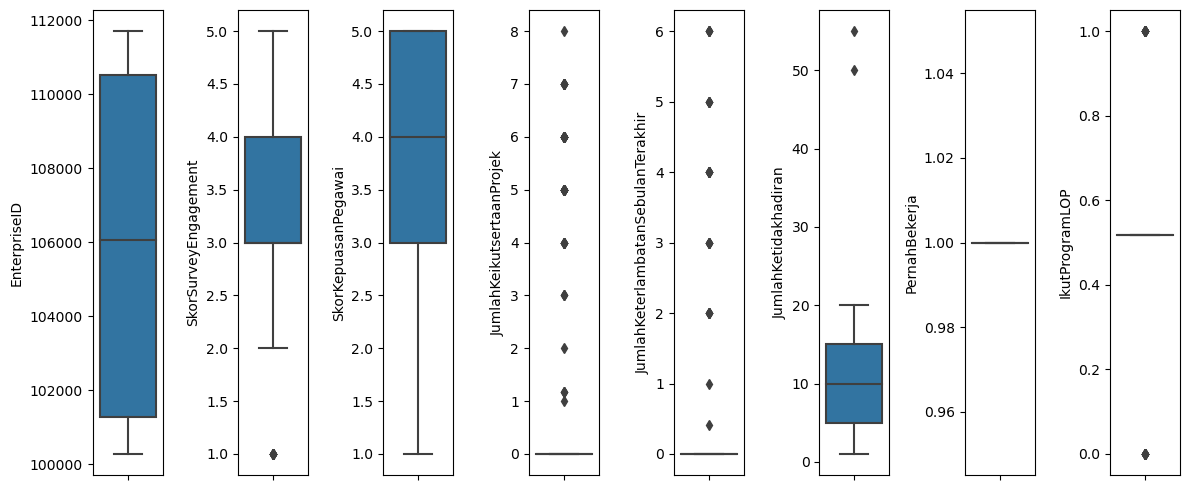

In [155]:
plt.figure(figsize=(12, 5))

for i, col in enumerate(nums1):
    plt.subplot(1, len(nums1), i + 1)
    sns.boxplot(y=df2[col], orient='v')
    plt.tight_layout()

plt.show()

In [156]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df2)}')

df_out = ['SkorSurveyEngagement','JumlahKetidakhadiran']

filtered_entries = np.array([True] * len(df2))

for col in df_out:
    zscore = abs(stats.zscore(df2[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df2 = df2[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df2)}')

Jumlah baris sebelum memfilter outlier: 287
Jumlah baris setelah memfilter outlier: 285


### Feature Selection
---

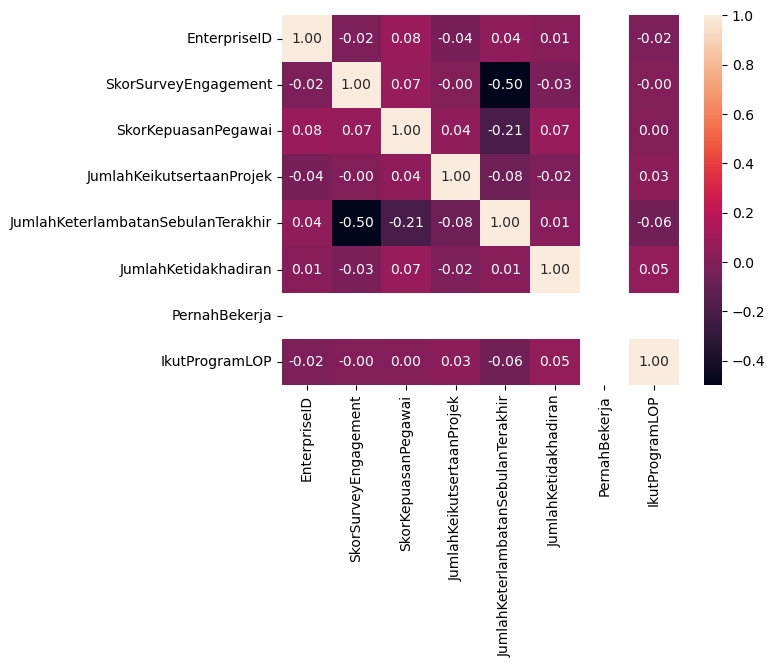

In [157]:
corr = df2[nums1].corr()
sns.heatmap(df2[nums1].corr(), annot=True, fmt= '.2f')
plt.show()

In [158]:
df3 = df2.drop(columns=['PernahBekerja','IkutProgramLOP','EnterpriseID','Username','NomorHP','Email','TanggalLahir'])

In [159]:
df3.head()

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,Magister,masih_bekerja,2011-01-10,2016-2-15,-
1,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,Sarjana,toxic_culture,2014-01-06,2020-1-17,2018-6-16
2,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,Magister,jam_kerja,2011-01-10,2016-01-10,2014-9-24
3,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,Sarjana,masih_bekerja,2014-2-17,2020-02-04,-
4,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,Sarjana,ganti_karir,2013-11-11,2020-1-22,2018-09-06


Kolom yang dihapus:
- Kolom 'PernahBekerja' dihapus karena memiliki satu unique value, dan juga kolom 'IkutProgramLOP' karena memiliki nilai yang hampir sama semua setelah dilakukan replace value karena terlalu banyak missing value.
- Kolom 'EnterpriseID', 'Username', 'NomorHP', 'Email', 'TanggalLahir' dihapus karena merupakan unique values.